Attempting to load Titanic dataset...
✓ Successfully loaded using requests method
Dataset shape: (891, 12)

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250  

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/var/folders/m5/j37mbl6160jd3jcb5gz8j6mc0000gn/T/ipykernel_8153/4235427247.py:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplac

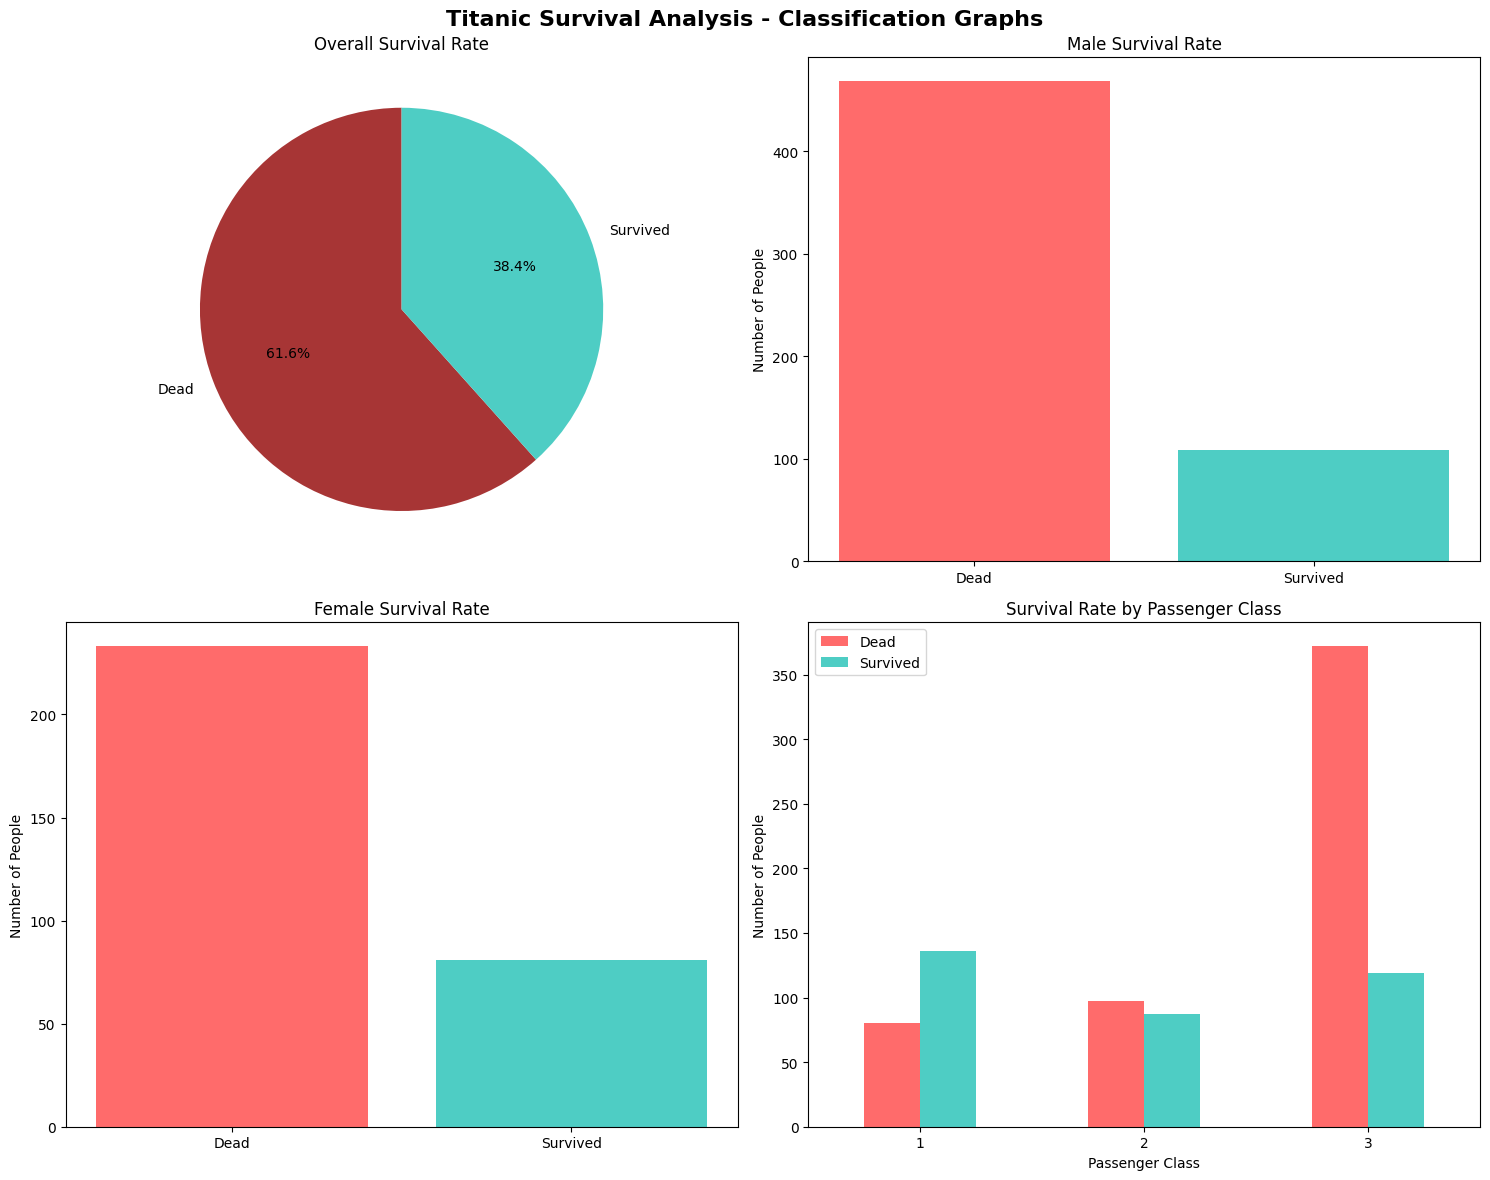


Summary Statistics:
Total passengers: 891
Overall survival rate: 38.38%
Male survival rate: 18.89%
Female survival rate: 74.20%

Survival rate by class:
Class 1: 62.96%
Class 2: 47.28%
Class 3: 24.24%

Dataset preprocessing completed successfully!
All null values have been handled and classification graphs have been plotted.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #converts text categorical data into numerical data ( converts "1" into 1)
import requests #http library: when you are hitting these urls to get dataset, for that we need request
import ssl #secured , helps to handle ssl certificate 

def load_data_with_requests():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    response = requests.get(url, verify=False)# get is a function to fetch the data, verify=false, disables ssl certificate, whatever req is there, it avoids thata
    from io import StringIO #converts downloadable text into file like object ( downloaded file into a file in such a format that it can be readable by pandas)
    df = pd.read_csv(StringIO(response.text))#.text converts downloaded object to text format (json/text into plain text which is very simple which is readable by any type of library)
    return df#return something in function 
    #we are fetching downloaded data and changing into a plain data read by pandas library
#if above function doesnt get executed then we will use this
def load_data_with_urllib():
    import urllib.request #later we use this to above we are using request.get and here urllib.request to get data
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    
    ssl_context = ssl.create_default_context()#creates an ssl, we are creating a secured connection
    ssl_context.check_hostname = False # disables host name verification 
    ssl_context.verify_mode = ssl.CERT_NONE # disables certification verification 
    
    with urllib.request.urlopen(url, context=ssl_context) as response: #opens url using urllib property (get) as response 
        df = pd.read_csv(response) 
    return df

def download_and_save():
    import requests
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    
    try:
        response = requests.get(url, verify=False)
        with open('titanic.csv', 'w') as f:
            f.write(response.text)
        print("Dataset downloaded successfully!")
        return pd.read_csv('titanic.csv')
    except Exception as e:
        print(f"Download failed: {e}")
        return None

def load_from_alternative():
    urls = [
        "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
        "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
    ]
    
    for url in urls:
        try:
            df = pd.read_csv(url)
            print(f"Successfully loaded from: {url}")
            return df
        except:
            continue
    
    print("All URLs failed. Please download the file manually.")
    return None

print("Attempting to load Titanic dataset...")

try:
    df = load_data_with_requests()
    print("✓ Successfully loaded using requests method")
except Exception as e:
    print(f"Method 1 failed: {e}")
    
    try:
        df = load_data_with_urllib()
        print("✓ Successfully loaded using urllib method")
    except Exception as e:
        print(f"Method 2 failed: {e}")
        
        # Try Method 3
        df = download_and_save()
        if df is None:
            print("All methods failed. Please download manually from:")
            print("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
            exit()

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nNull values in each column:")
print(df.isnull().sum())

print("\nPreprocessing the dataset...")

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop('Cabin', axis=1, inplace=True)#x=1, remove column, x=0, remove rows
df.dropna(inplace=True)#empty rows 

print("Dataset shape after preprocessing:", df.shape)
print("\nNull values after preprocessing:")
print(df.isnull().sum())


le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
df['Embarked_encoded'] = le.fit_transform(df['Embarked'])

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Titanic Survival Analysis - Classification Graphs', fontsize=16, fontweight='bold')

# Overall survival pie chart
survival_counts = df['Survived'].value_counts()#df is data set, survival_counts -->counts unique value (0 or 1, 0 for dead, 1 for survive as in dataset)
axes[0, 0].pie(survival_counts.values, labels=['Dead', 'Survived'], #[0,0]--> top left, [0,1]--> top right, [1,0]--->bottom left, [1,1]--->bottom right
               autopct='%1.1f%%', startangle=90, colors=["#a73535", '#4ecdc4'])
axes[0, 0].set_title('Overall Survival Rate')

# Male survival bar chart
male_survival = df[df['Sex'] == 'male']['Survived'].value_counts()
x_pos = np.arange(len(male_survival))#array
axes[0, 1].bar(x_pos, male_survival.values, color=['#ff6b6b', '#4ecdc4'])
axes[0, 1].set_xticks(x_pos)#position x axis label
axes[0, 1].set_xticklabels(['Dead', 'Survived']) #label given to bar chart, set label for x
axes[0, 1].set_title('Male Survival Rate') #title over bar chart
axes[0, 1].set_ylabel('Number of People')

female_survival = df[df['Sex'] == 'female']['Survived'].value_counts()
x_pos = np.arange(len(female_survival))
axes[1, 0].bar(x_pos, female_survival.values, color=['#ff6b6b', '#4ecdc4'])
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(['Dead', 'Survived'])
axes[1, 0].set_title('Female Survival Rate')
axes[1, 0].set_ylabel('Number of People')

class_survival = pd.crosstab(df['Pclass'], df['Survived']) #creates cross stabilation  
class_survival.plot(kind='bar', ax=axes[1, 1], color=['#ff6b6b', '#4ecdc4'])
axes[1, 1].set_title('Survival Rate by Passenger Class')
axes[1, 1].set_xlabel('Passenger Class')
axes[1, 1].set_ylabel('Number of People')
axes[1, 1].legend(['Dead', 'Survived'])
axes[1, 1].tick_params(axis='x', rotation=1)#x axis label horizontal 

plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print("="*50)
print(f"Total passengers: {len(df)}")
print(f"Overall survival rate: {df['Survived'].mean():.2%}")
print(f"Male survival rate: {df[df['Sex'] == 'male']['Survived'].mean():.2%}")
print(f"Female survival rate: {df[df['Sex'] == 'female']['Survived'].mean():.2%}")

print("\nSurvival rate by class:")
for pclass in sorted(df['Pclass'].unique()):
    rate = df[df['Pclass'] == pclass]['Survived'].mean()
    print(f"Class {pclass}: {rate:.2%}")

print("\nDataset preprocessing completed successfully!")
print("All null values have been handled and classification graphs have been plotted.")